# Low Pass Filter

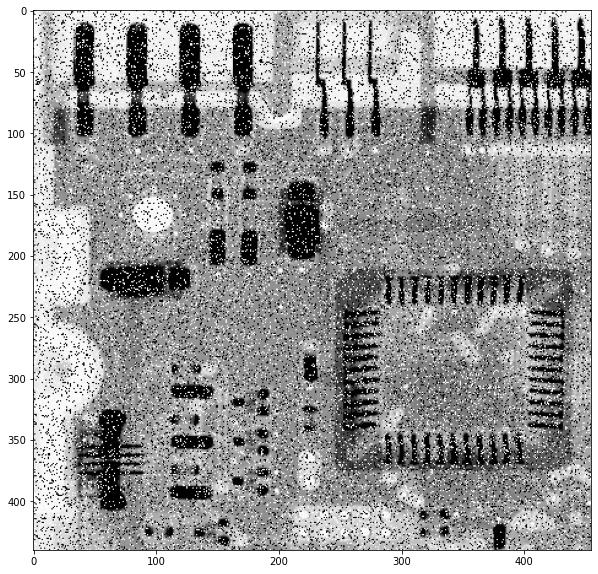

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO


# Open the image file


fig1 = "https://drive.google.com/uc?id=1S4bNTi751ZtQQEeENirBYxA49UxLxwJL"
fig2 = "https://drive.google.com/uc?id=1OwOfDwdlawaant58ZDmPdxMwYGusR6PU"
Image.open(BytesIO(requests.get(fig1).content)).save('Fig(1).tif')
Image.open(BytesIO(requests.get(fig2).content)).save('Fig(2).tif')

img = Image.open('Fig(1).tif')

# Convert the image data to a numpy array
img_array = np.array(img)

width = img_array.shape[0]
height = img_array.shape[1]

# Convert the numpy array back to an image
img_from_array = Image.fromarray(np.uint8(img_array))

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_from_array,cmap='gray')
plt.show()


In [2]:
img_array.shape

(440, 455)

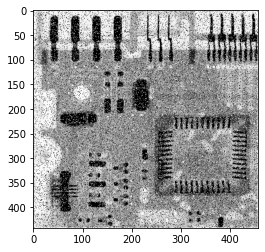

In [5]:
#add pad to image
img_array_padded = np.pad(img_array, pad_width=1,  mode='wrap')

# Convert the numpy array back to an image
img_from_array = Image.fromarray(np.uint8(img_array_padded))

# Display the image
plt.imshow(img_from_array,cmap='gray')
plt.show()

## Apply Average (Mean) Filter

In [6]:
filter_size = 3
filter = np.empty((filter_size, filter_size))
output_image = np.empty(img_array.shape)

for y in range(height):
    for x in range(width):

        for i in range(filter_size):
            for j in range(filter_size):
                filter[i][j] = img_array_padded[i+x,j+y]


        mean_filter = 0
        for i in range(filter_size):
            for j in range(filter_size):
                mean_filter +=  filter[i][j]*(1/9)

        output_image[x][y] = mean_filter

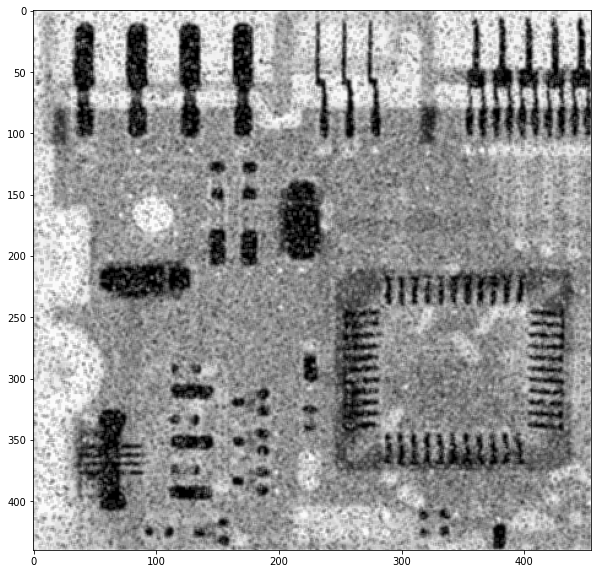

In [7]:
img_from_array = Image.fromarray(np.uint8(output_image))

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_from_array,cmap='gray')
plt.show()

## Apply Median Filter

In [8]:
filter_size = 3
output_image = np.empty(img_array.shape)

for y in range(height):
    for x in range(width):
        
        filter = np.empty(0)
        filter = filter.astype(np.uint8)
    
        for i in range(filter_size):
            for j in range(filter_size):
                filter = np.append( filter, img_array_padded[i+x,j+y])
                
        sorted_filter = np.sort(filter)
        
        middle_value = sorted_filter[(len(filter) - 1) // 2]
        
        output_image[x][y] = middle_value

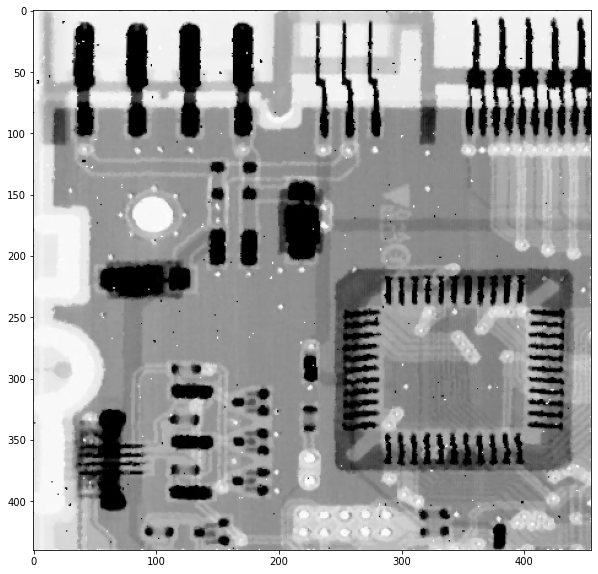

In [9]:
img_from_array = Image.fromarray(np.uint8(output_image))

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_from_array,cmap='gray')
plt.show()

# High Pass Filter

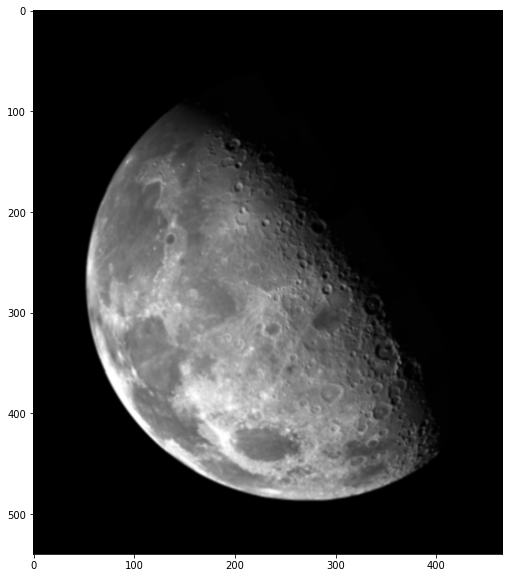

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image file
img = Image.open('Fig(2).tif')

# Convert the image data to a numpy array
img_array = np.array(img)

width = img_array.shape[0]
height = img_array.shape[1]

# Convert the numpy array back to an image
img_from_array = Image.fromarray(np.uint8(img_array))

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_from_array,cmap='gray')
plt.show()


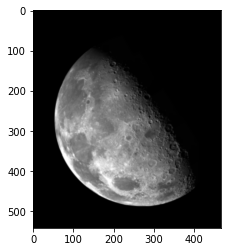

In [11]:
#add pad to image
img_array_padded = np.pad(img_array, pad_width=1,  mode='constant', constant_values=0)

# Convert the numpy array back to an image
img_from_array = Image.fromarray(np.uint8(img_array_padded))

# Display the image
plt.imshow(img_from_array,cmap='gray')
plt.show()

## Apply Sharpening Filter Pass

In [12]:


filter_size = 3
filter = np.empty((filter_size, filter_size))

mask = np.array([[-1,-1,-1],
                 [-1, 9,-1],
                 [-1,-1,-1]])


output_image = np.empty(img_array.shape)

for y in range(height):
    for x in range(width):

        for i in range(filter_size):
            for j in range(filter_size):
                filter[i][j] = mask[i][j] * img_array_padded[i+x,j+y]


        sum_filter = 0
        for i in range(filter_size):
            for j in range(filter_size):
                sum_filter +=  filter[i][j]

        output_image[x][y] =  sum_filter 
output_image = np.clip(output_image, 0, 255)

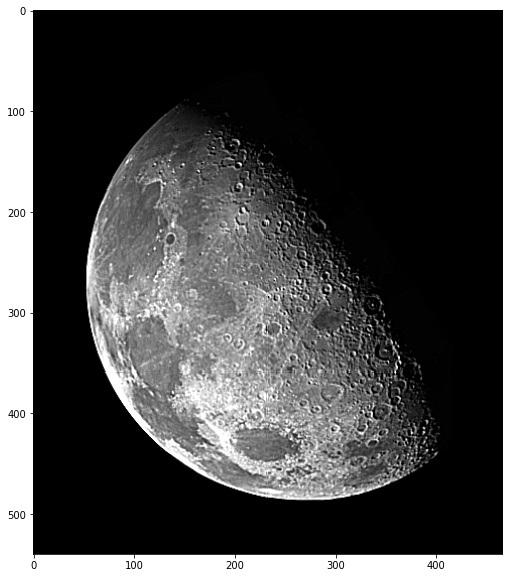

In [13]:
img_from_array = Image.fromarray(np.uint8(output_image))

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_from_array,cmap='gray')
plt.show()

## Code test from lecture note

# Make gray level image

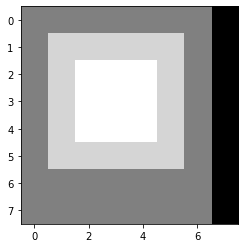

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Your array
f = np.array([[4,4,4,4,4,4,4,1],
              [4,6,6,6,6,6,4,1],
              [4,6,7,7,7,6,4,1],
              [4,6,7,7,7,6,4,1],
              [4,6,7,7,7,6,4,1],
              [4,6,6,6,6,6,4,1],
              [4,4,4,4,4,4,4,1],
              [4,4,4,4,4,4,4,1]])

# Display the image in grayscale
plt.imshow(f,cmap='gray')
plt.show()


# Histogram Distribution

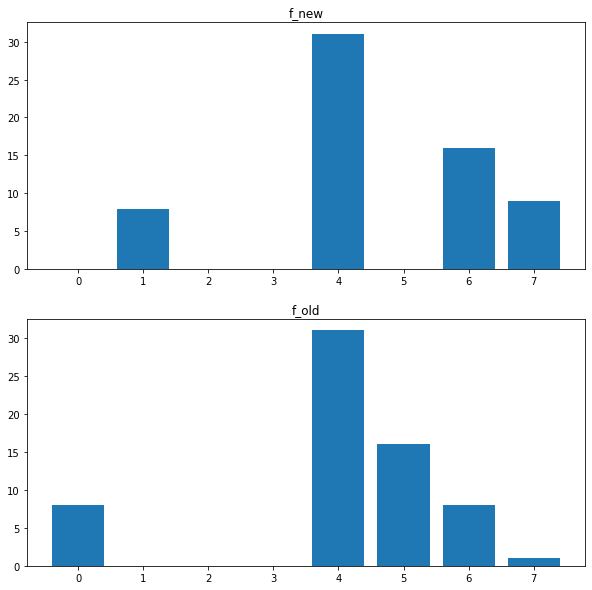

In [15]:
import matplotlib.pyplot as plt
import numpy as np

f_old = np.array([[4,4,4,4,4,4,4,0],
                  [4,5,5,5,5,5,4,0],
                  [4,5,6,6,6,5,4,0],
                  [4,5,6,7,6,5,4,0],
                  [4,5,6,6,6,5,4,0],
                  [4,5,5,5,5,5,4,0],
                  [4,4,4,4,4,4,4,0],
                  [4,4,4,4,4,4,4,0]])

f_new = np.array([[4,4,4,4,4,4,4,1],
                  [4,6,6,6,6,6,4,1],
                  [4,6,7,7,7,6,4,1],
                  [4,6,7,7,7,6,4,1],
                  [4,6,7,7,7,6,4,1],
                  [4,6,6,6,6,6,4,1],
                  [4,4,4,4,4,4,4,1],
                  [4,4,4,4,4,4,4,1]])

# Flatten the arrays
f_flat_new = f_new.flatten()
f_flat_old = f_old.flatten()

# Create figure and axes
fig , axs = plt.subplots(2, figsize=(10, 10))

# Create histogram for f_new
axs[0].hist(f_flat_new,bins=range(9), align='left', rwidth=0.8)
axs[0].set_title('f_new')
axs[0].set_xticks(range(8))

# Create histogram for f_old
axs[1].hist(f_flat_old,bins=range(9), align='left', rwidth=0.8)
axs[1].set_title('f_old')
axs[1].set_xticks(range(8))
# Show the plot
plt.show()


In [16]:
img_array = np.array([[21,19,17,25,28],
                      [71,76,73,68,59],
                      [153,164,164,157,155],
                      [200,201,190,185,180],
                      [205,210,215,230,232]])
img_array_padded = img_array

filter_size = 3
filter = np.empty((filter_size, filter_size))

mask = np.array([[-1,-1,-1],
                 [-1, 8,-1],
                 [-1,-1,-1]])

output_image = np.empty(mask.shape)

for y in range(3):
    for x in range(3):

        for i in range(filter_size):
            for j in range(filter_size):
                filter[i][j] = mask[i][j] * img_array_padded[i+x,j+y]


        sum_filter = 0
        for i in range(filter_size):
            for j in range(filter_size):
                sum_filter +=  filter[i][j]

        output_image[x][y] = sum_filter

In [17]:
img_array

array([[ 21,  19,  17,  25,  28],
       [ 71,  76,  73,  68,  59],
       [153, 164, 164, 157, 155],
       [200, 201, 190, 185, 180],
       [205, 210, 215, 230, 232]])

In [18]:
output_image

array([[ -74., -106., -134.],
       [ 184.,  198.,  182.],
       [ 107.,   -6.,  -43.]])

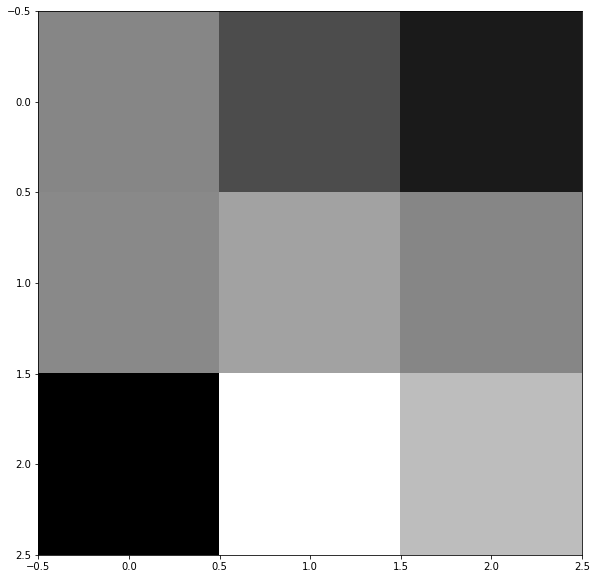

In [19]:
img_from_array = Image.fromarray(np.uint8(output_image))

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_from_array,cmap='gray')
plt.show()

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#1. Open the image file
img = Image.open('Fig(2).tif')

#2. Convert the image data to a numpy array
img_array = np.array(img)

#3. Extract the size of array matrix
width = img_array.shape[0]
height = img_array.shape[1]

#4. add pad to image
img_array_padded = np.pad(img_array, pad_width=1,  mode='wrap')



filter_size = 3
#5. Create an empty filter 1D array
filter = np.empty((filter_size, filter_size))

#6.  Create a sharping filter mask ([[-1,-1,-1], [-1, 9,-1], [-1,-1,-1]])
mask = np.array([[-1,-1,-1],
                 [-1, 9,-1],
                 [-1,-1,-1]])

#7.  Create an empty output image matrix
output_image = np.empty(img_array.shape)

for y in range(height):
    for x in range(width):
        
        for i in range(filter_size):
            for j in range(filter_size):
                
                #8.  Append the multiplication each member of sharping filter mask of padded image (3 x 3)  into filter array
                filter[i][j] = mask[i][j] * img_array_padded[i+x,j+y]

        
        #9.  Compute the sum of each filter array members
        sum_filter = 0
        for i in range(filter_size):
            for j in range(filter_size):
                sum_filter +=  filter[i][j]

        #10.  Import the value of previous step to the output image matrix        
        output_image[x][y] =  sum_filter 
    
#11.  Clip the output image pixel values from 0 to 255
output_image = np.clip(output_image, 0, 255)